## Introduction
In this coursework I firstly wrote implemented linear PCA and multi-clss perceptron. Then getting the pass rate for 2 dimension to 12 dimension feature space. Finally implemented the non-linear PCA and the grid search from 329 dimension to 13 dimension space. 
The pass rate for perceptron increasing with the dimension of featre space. For 2 dimension, perceptron can only get the pass rate around 30%, but with high dimension can reach to  100%

## PCA and plotting
This cell used to implement linear PCA and plot a diagram for 2pc data. I seperated the dataset into data and target. The "data" list contains all data. and "label" list contains all target
### Analysis
In the diagram we can see that all class data clustering in a same area, we can not seperate them with 6 lines. It not linear separable.


/var/folders/0s/51tm53rs6nbg86wl5p3tn_bh0000gn/T/ipykernel_45136/783739277.py:27: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  label_NewData = pd.concat([label,NewDataFrame],1)


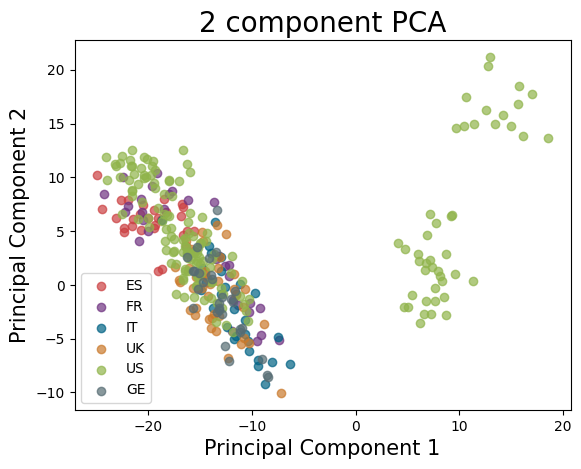

In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import multivariate_normal

##import data
speech = pd.read_csv('/Users/apple/Downloads/accent-mfcc-data-1.data',header=None)
label = speech.iloc[:,0]
data = speech.iloc[:,1:]

##PCA function
#INPUT data, pca dimention
#OUTPUT Vh
def PCA(x,dimention):
    x -= np.mean(x,axis = 0)
    cov = np.dot(x.T, x)/x.shape[0]
    U, D, Vh = np.linalg.svd(cov ,full_matrices=True)
    return Vh[:dimention]


# Project PCA into data
data1 = data.copy()
NewData = np.dot(data,PCA(data1,2).transpose())

#Get data for each class
NewDataFrame = pd.DataFrame(NewData)
label_NewData = pd.concat([label,NewDataFrame],1)
label_NewData.columns = [0,1,2]
ES = label_NewData[label_NewData[0]=="ES"]
FR = label_NewData[label_NewData[0]=="FR"]
IT = label_NewData[label_NewData[0]=="IT"]
GE = label_NewData[label_NewData[0]=="GE"]
UK = label_NewData[label_NewData[0]=="UK"]
US = label_NewData[label_NewData[0]=="US"]

#Plotting diagram
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 component PCA', fontsize = 20)
plt.scatter(ES[1], ES[2], c='#CB4042', marker='o',alpha=0.7,label='ES')
plt.scatter(FR[1], FR[2], c='#6F3381', marker='o',alpha=0.7,label='FR')
plt.scatter(IT[1], IT[2], c='#006284', marker='o',alpha=0.7,label='IT')
plt.scatter(UK[1], UK[2], c='#CA7A2C', marker='o',alpha=0.7,label='UK')
plt.scatter(US[1], US[2], c='#90B44B', marker='o',alpha=0.7,label='US')
plt.scatter(GE[1], GE[2], c='#566C73', marker='o',alpha=0.7,label='GE')
plt.legend()
plt.show()

## Perceptron and Passrate
In this cell contains a function for implement perceptron, a function to get pass rate and run the perceptron in original feature space. The perceptron in this space has pass rate around 60% to 70%.
### Perceptron
Shuffle the data by randomlu select index. Iterated 10 times, each time go through each data in data list. Initialized W with zeros, update $W$ when predict result is different from the ground truth. W updated by substract $x_{i}$ form $W_{\hat{y}}$, add $x_{i}$ to $W_{y}$. This funtion return $W$ after iterated 10 times.
### Passrate
Using the W get from perceptron function, run the original data. Count the number of data predicted right.
### Analysis
The pass rate of perceptron in orginal feature space is around 60%, which means the 6 lineas can not separate at least 30% of the data . It is not linear separable in this space.

In [45]:
import random
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import multivariate_normal

##import data
speech = pd.read_csv('/Users/apple/Downloads/accent-mfcc-data-1.data',header=None)
label = speech.iloc[:,0]
data = speech.iloc[:,1:]

##Perceptron function 
#INPUT X:data Y:target W: W_zero
#OUTPUT W
def Perceptron(X, Y, W):
    errorFlag = 1
    step = 0
    Z = np.c_[X,np.ones(X.shape[0])] #add bias
    column  = Z.shape[1]
    # print(column)
    while errorFlag and step<=10:
        step += 1
        errSum = 0
        errorFlag = 0
        indic = list(range(Z.shape[0]))
        random.shuffle(indic)        #shuffle data
        class_name,class_loc = np.unique(Y,return_inverse = True)
        for i in indic:              #for each data
            z = Z[i,:]  
            y = class_loc[i]
            y_pre = np.matmul(W,z)
            y_pre_loc = np.argmax(y_pre)
            if y_pre_loc != y:       #compare predict with ground truth
                errorFlag = 1
                W[y_pre_loc] = W[y_pre_loc] - z
                W[y] = W[y] + z      #refine W
                errSum += 1
    return W



## Accurancy function 
#  INPUT data,target,W(get from perseptron)
#  OUTPUT accurancy
data3 = data.copy()
data3 = data3.to_numpy()
def redic(X,Y,W):
    correct=0
    Z = np.c_[X,np.ones(X.shape[0])]
    class_name,class_loc = np.unique(Y,return_inverse = True)
    for i in range(X.shape[0]):
        z = Z[i,:]
        # y = Y[i]
        y = class_loc[i]
        y_pre = np.matmul(W,z)
        y_pre = np.argmax(y_pre)
        if y_pre == y:
            correct += 1
    return correct/len(X)

#Run Pertectron in 12 dimension
W_zeros = np.zeros((6,13)) 
data2 = data.copy()
_W = Perceptron(data2,label, W_zeros)
pass_rate = redic(data3,label,_W)
print("Pass rate in  original feature space is "+str(int(pass_rate*100))+"%")




Pass rate in  original feature space is 65%


## Perceptron with PCA
Run PCA function to get $Vh$ for all 12 dimension. Project $Vh$ to data from 2 to 11. For each pc run perceptron and get the pass rate.
### Analysis
As the results shows. The pass rate from 2pc to 11 pc are all under 100%, thay are still some data can not be separated by 6 lines.

In [46]:
##Implement perceptron for 2pc to 11pc

pca_all = PCA(data,12)                      #get Vh for 12pca
for i in range(2,12):
    pca = pca_all[:i]            
    W_zeros = np.zeros((6,i+1)) 
    Z = np.matmul(data, np.transpose(pca)) #project data in pca from 2-11
    _W = Perceptron(Z,label,W_zeros)       
    pass_rate = redic(Z,label,_W)*100      
    print("Pass rate in "+str(i)+"pc is "+ str(int(pass_rate))+"%")
    


Pass rate in 2pc is 41%
Pass rate in 3pc is 49%
Pass rate in 4pc is 52%
Pass rate in 5pc is 51%
Pass rate in 6pc is 49%
Pass rate in 7pc is 56%
Pass rate in 8pc is 60%
Pass rate in 9pc is 57%
Pass rate in 10pc is 63%
Pass rate in 11pc is 65%


## Non-linear PCA
get_Kernel function get the RBF kernel. Input the RBF kernal in normalized_K funtion to normaliz kernel. Use the normalized K to get Vh. As $\sigma^{2}$ equals variance. So, get the variance from centered data. Using variance to get a list of $\gamma$ 

In [47]:
##Get kernel K
# INPUT data gamma
# OUTPUT Kernel
def get_Kernel(X,gamma):
    M = np.zeros((len(X),len(X)))
    for i in range(len(X)):
        for j in range(len(X)):
            M[i,j] = np.exp(-gamma*np.linalg.norm(X[i, :]-X[j, :])**2)
    return M

##Get normalized kernel
# INPUT K
# OUTPUT noemalized K
def normalize_K(K):
    n= len(K)
    A =  np.full((n, n), 1/n)
    # print(A)
    K_bar = K-np.matmul(A,K)-np.matmul(K,A) +np.matmul((np.matmul(A,K)),A)
    return K_bar

##Get kernel PCA
# INPUT normalized K, dimension
# OUTPUT Vh
def non_linearPCA(K,dimension):
    U, D, Vh = np.linalg.svd(K ,full_matrices=True)
    # Vh = Vh.transpose()
    return Vh

##Get gamma list
data_c = data.copy()
Center_data = data - np.mean(data_c,axis = 0) #centralize data
variance = np.var(Center_data,axis =0)
var_max = np.max(variance)
var_min = np.min(variance)
EPSLON =0.05
gamma_min = 1/(2*(var_max+EPSLON))
gamma_max = 1/(2*(var_min-EPSLON))
gamma_list = np.arange(gamma_min,gamma_max,0.01)


## Grid search
A rsult matrix to store the result dunder each pca and $\gamma$. For each $\gamma$ run non-linear PCA for 329 dimension. For each PC run perceptron and get a pass rate. This cell will running around 5-2 minute.
### Analysis
Runing perceptron with 10 iterate the pass rate can get 100% with at minimum 256 dimension where $\gamma = 0.079$. 


In [48]:
result = np.zeros((329-13,len(gamma_list)))     #initialize result matrix

## Running grid search
for gamma_loc in range(len(gamma_list)):
    gamma = gamma_list[gamma_loc]
    print("\nLinear separability with gamma "+ str(round(gamma,2)))
    K = normalize_K(get_Kernel(data.to_numpy(),gamma))
    pca_all = non_linearPCA(K,329)               #get 329pca
    Z= np.matmul(K,np.transpose(pca_all))        #peoject data into pca
    for di in range(329,12,-1):
        z = Z[:,:di]                             #get 329pca - 13pca
        W_zeros = np.zeros((6,di+1))
        _W = Perceptron(z,label,W_zeros)
        pass_rate = redic(z,label,_W)*100
        result[di-14,gamma_loc] = pass_rate
        print("["+ str(di) +" | "+str(int(pass_rate))+"% ]",end ='')

    


Linear separability with gamma 0.02
[329 | 89% ][328 | 90% ][327 | 96% ][326 | 94% ][325 | 88% ][324 | 83% ][323 | 89% ][322 | 89% ][321 | 91% ][320 | 85% ][319 | 92% ][318 | 94% ][317 | 89% ][316 | 92% ][315 | 91% ][314 | 84% ][313 | 94% ][312 | 93% ][311 | 91% ][310 | 95% ][309 | 93% ][308 | 92% ][307 | 91% ][306 | 91% ][305 | 88% ][304 | 91% ][303 | 93% ][302 | 95% ][301 | 93% ][300 | 89% ][299 | 93% ][298 | 93% ][297 | 84% ][296 | 86% ][295 | 92% ][294 | 89% ][293 | 88% ][292 | 87% ][291 | 89% ][290 | 89% ][289 | 87% ][288 | 89% ][287 | 91% ][286 | 92% ][285 | 91% ][284 | 87% ][283 | 93% ][282 | 92% ][281 | 90% ][280 | 94% ][279 | 91% ][278 | 92% ][277 | 89% ][276 | 94% ][275 | 89% ][274 | 91% ][273 | 93% ][272 | 89% ][271 | 89% ][270 | 90% ][269 | 86% ][268 | 89% ][267 | 87% ][266 | 84% ][265 | 88% ][264 | 94% ][263 | 92% ][262 | 93% ][261 | 96% ][260 | 94% ][259 | 93% ][258 | 91% ][257 | 89% ][256 | 89% ][255 | 94% ][254 | 85% ][253 | 92% ][252 | 95% ][251 | 90% ][250 | 91% ][24

## Min PC count
Find out the minimun top PCs needed for linear separable and $\gamma$

In [52]:
gammas = []
pcs = []
for i in range(result.shape[1]):
    for j in range(result.shape[0]):
        if int(result[j][i]) == 100:
            gammas.append(i)
            pcs.append(j)
pc_min_loc = np.argmin(pcs)
pc_min = np.min(pcs)
gamma_min = gammas[pc_min_loc]
print("The minimum top PCs is "+ str(pc_min)+" with gamma equles to "+str(gamma_list[gamma_min]))
print("Total number of data has 100% pass rate "+ str(len(pcs)))
a = np.array(gammas)
for i in range(1,len(gamma_list)):
    num_occurrences = np.count_nonzero(a == i)
    print("The number of linear separable data for gamma="+str(gamma_list[i])+" is "+str(num_occurrences))
    mean = np.mean(result[:,i])
    print("mean pass rate for gamma ="+str(gamma_list[i])+" is "+str(mean))


The minimum top PCs is 269 with gamma equles to 0.07920499723800103
Total number of data has 100% pass rate 44
The number of linear separable data for gamma=0.029204997238001032 is 0
mean pass rate for gamma =0.029204997238001032 is 91.93759378246315
The number of linear separable data for gamma=0.039204997238001034 is 0
mean pass rate for gamma =0.039204997238001034 is 92.6157131314686
The number of linear separable data for gamma=0.049204997238001036 is 1
mean pass rate for gamma =0.049204997238001036 is 92.49644107575699
The number of linear separable data for gamma=0.05920499723800104 is 11
mean pass rate for gamma =0.05920499723800104 is 91.94913623946749
The number of linear separable data for gamma=0.06920499723800104 is 15
mean pass rate for gamma =0.06920499723800104 is 90.80450925320304
The number of linear separable data for gamma=0.07920499723800103 is 17
mean pass rate for gamma =0.07920499723800103 is 89.89169327844253


### Analysis
 From the data provide in last cell we can see the number of linear separability increase with $\gamma$. The $\gamma = 0.079$ can get most number of 100% pass rate data. But it has the lowest mean pass rate. For $\gamma =0.069$, although it has less linear seperable data than $\gamma = 0.079$, but the mean performance is much higher than $\gamma = 0.079$. In conclusion, $\gamma = 0.069$ is the best $\gamma$ value.

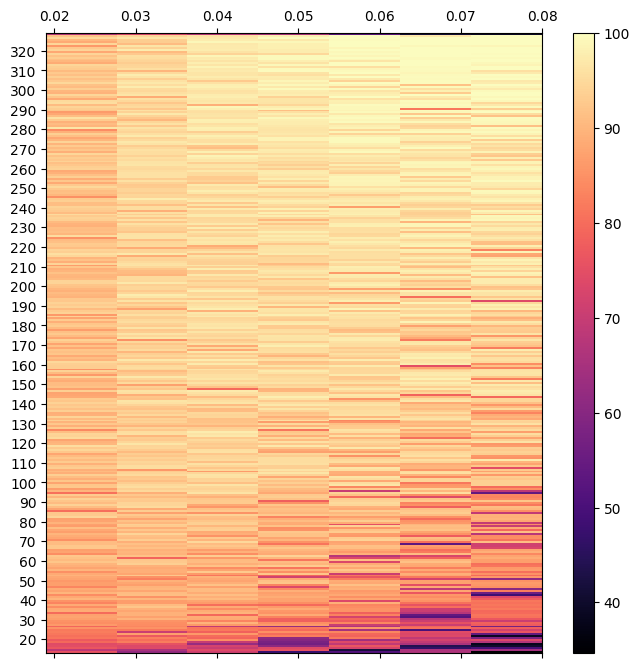

In [ ]:
from matplotlib.pyplot import MultipleLocator

#Mapping heatmeap for result matrix

plt.figure(figsize=(8,8))
gamma = []
for i in gamma_list:
    gamma.append(round(i,3))
caxes = plt.matshow(result,cmap = 'magma',aspect='auto',origin='lower',extent = [gamma[0],0.08,13,329], fignum=1)
y = MultipleLocator(10) 
ax = plt.gca()
ax.yaxis.set_major_locator(y)
plt.colorbar(caxes,aspect = 30)
plt.show()
